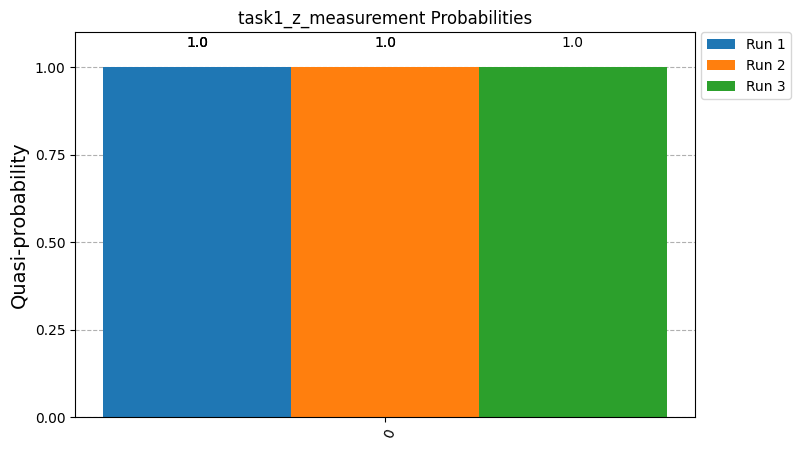

Q-sphere not available for task1_z_measurement


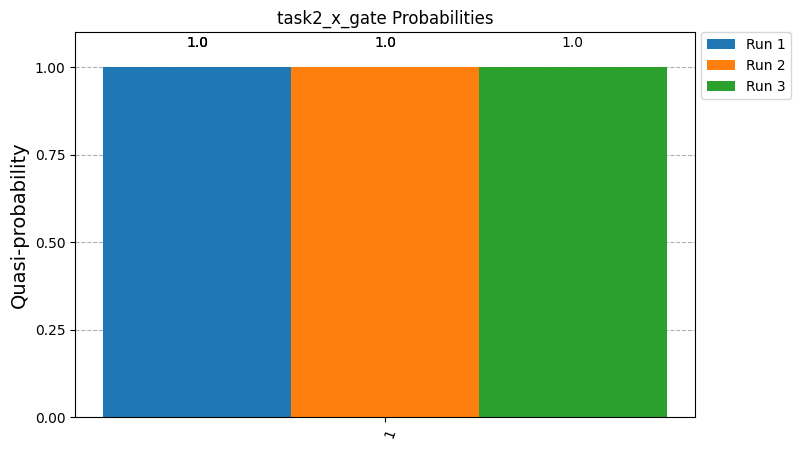

Q-sphere not available for task2_x_gate


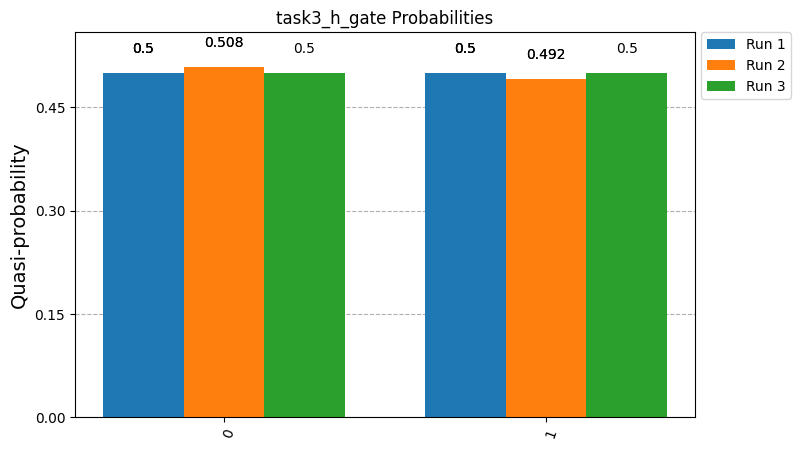

Q-sphere not available for task3_h_gate


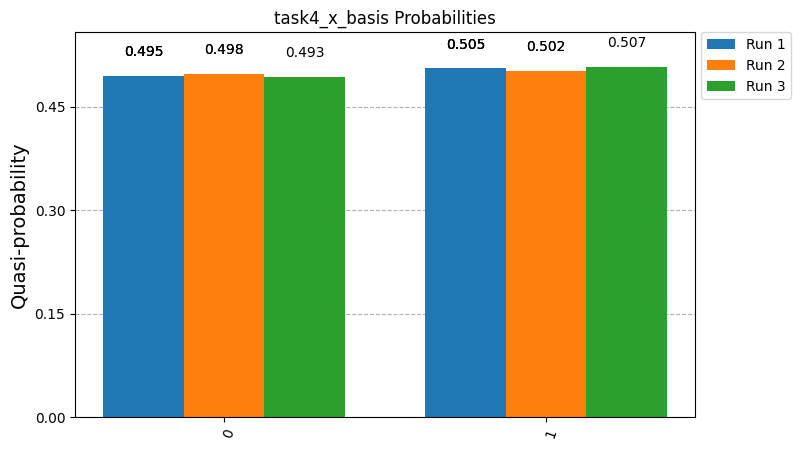

Q-sphere not available for task4_x_basis


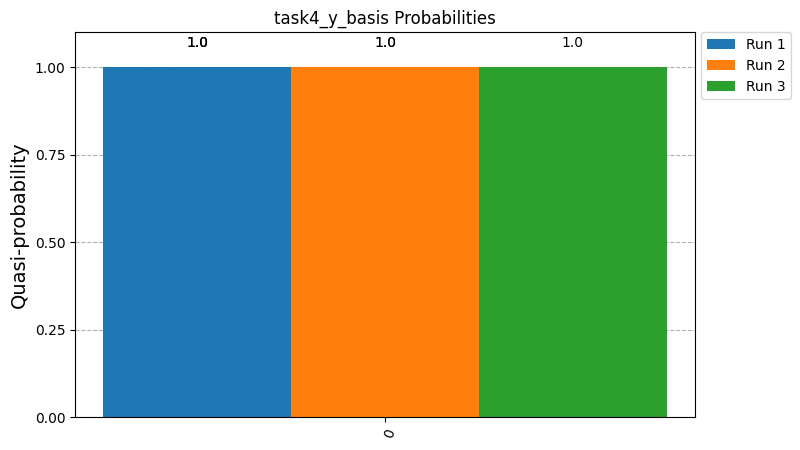

Q-sphere not available for task4_y_basis


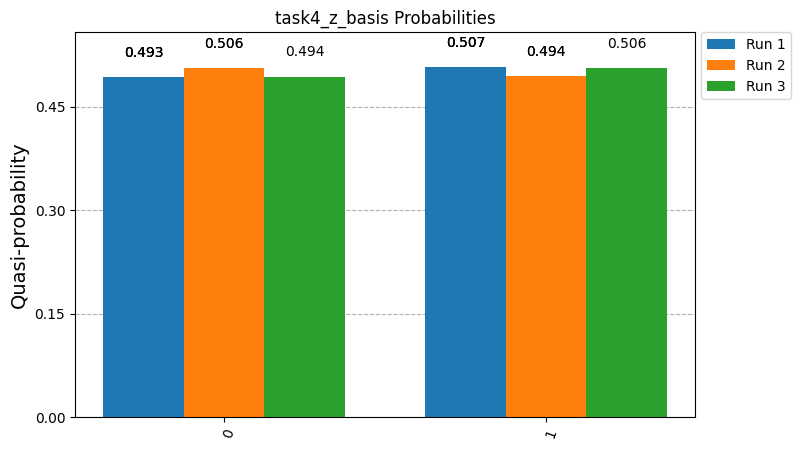

Q-sphere not available for task4_z_basis


In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import *
from numpy import pi
backend = Aer.get_backend('qasm_simulator')
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.quantum_info import Statevector
import io
from PIL import Image
import os

os.makedirs("outputs", exist_ok=True)

def plot_task(circuit, shots=2048, runs=3, title=""):
    backend = Aer.get_backend('qasm_simulator')
    tcirc = transpile(circuit, backend)
    
    results = []
    for _ in range(runs):
        r = backend.run(tcirc, shots=shots).result().get_counts()
        results.append(r)
    
    quasi_results = []
    for run_counts in results:
        total = sum(run_counts.values())
        quasi_results.append({k: v / total for k, v in run_counts.items()})
    
    # Save circuit diagram
    circuit.draw(output='mpl', filename=f"outputs/{title}_circuit.png")
    
    # Histogram
    fig, ax = plt.subplots(figsize=(8, 5))
    run_labels = [f"Run {i+1}" for i in range(runs)]
    plot_histogram(quasi_results, ax=ax, legend=run_labels, title=f"{title} Probabilities")
    plt.savefig(f"outputs/{title}_histogram.png")
    plt.show()
    
    # Q-sphere - skip if seaborn not available
    try:
        circuit_no_meas = circuit.remove_final_measurements(inplace=False)
        if circuit_no_meas.num_qubits == 1:
            state = Statevector.from_instruction(circuit_no_meas)
            qsphere_fig = plot_state_qsphere(state)
            qsphere_fig.savefig(f"outputs/{title}_qsphere.png")
            plt.show()
    except:
        print(f"Q-sphere not available for {title}")

# -------- TASK 1: Z-type projection measurement --------

qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.measure(qreg[0], creg[0])

plot_task(circuit, title="task1_z_measurement")

# -------- TASK 2: X gate operation --------

qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.x(qreg[0])
circuit.measure(qreg[0], creg[0])

plot_task(circuit, title="task2_x_gate")

# -------- TASK 3: Hadamard gate (superposition) --------

qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.measure(qreg[0], creg[0])

plot_task(circuit, title="task3_h_gate")

# -------- TASK 4: State tomography - measurements in different bases --------

# X basis measurement
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.ry(pi/2, qreg[0])
circuit.p(pi/2, qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg[0], creg[0])

plot_task(circuit, title="task4_x_basis")

# Y basis measurement
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.ry(pi/2, qreg[0])
circuit.p(pi/2, qreg[0])
circuit.sdg(qreg[0])
circuit.h(qreg[0])
circuit.measure(qreg[0], creg[0])

plot_task(circuit, title="task4_y_basis")

# Z basis measurement
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)
circuit.ry(pi/2, qreg[0])
circuit.p(pi/2, qreg[0])
circuit.measure(qreg[0], creg[0])

plot_task(circuit, title="task4_z_basis")